In [1]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_lables)=imdb.load_data(num_words=10000)


17464789/17464789 [==============================] - 1s 0us/step


In [2]:
#Here tarin_data and test_data are list of reviews and train_lables and test_labels are lists in 0s and 1s where 0 stand for negative and 1 stand for postive
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:

max([max(sequence) for sequence in train_data])

9999

In [42]:
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_review=" ".join([reverse_word_index.get(i-3,"?") for i in train_data[0]])


In [12]:
#encoding the integer sequence via multihot encoding
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        for j in sequence:
          results[i,j]=1
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)



In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
#We should vectorize our lables too which is pretty staright forward
y_train=np.array(train_labels).astype("float32")
y_test=np.array(test_lables).astype("float32")

In [18]:
#Bulding the models
#model Defination
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])


In [21]:
#compling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [22]:
#setting aside the validation set
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [24]:
#Training the model
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val)
                  )

Epoch 1/20
30/30 [==============================] - 5s 90ms/step - loss: 0.5170 - accuracy: 0.7915 - val_loss: 0.3938 - val_accuracy: 0.8626
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3224 - accuracy: 0.8923 - val_loss: 0.3194 - val_accuracy: 0.8791
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2424 - accuracy: 0.9192 - val_loss: 0.2979 - val_accuracy: 0.8800
Epoch 4/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1989 - accuracy: 0.9309 - val_loss: 0.2797 - val_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1639 - accuracy: 0.9455 - val_loss: 0.2971 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 2s 82ms/step - loss: 0.1402 - accuracy: 0.9559 - val_loss: 0.3033 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 3s 90ms/step - loss: 0.1245 - accuracy: 0.9601 - val_loss: 0.3028 - val_accuracy: 0.8841
Epoch 8/20
30

In [29]:
#From above we can see after the fourth epochs the model is overfitting in this case we can stop training
#I will again do it later from scratch upto 4 epochs only

In [25]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

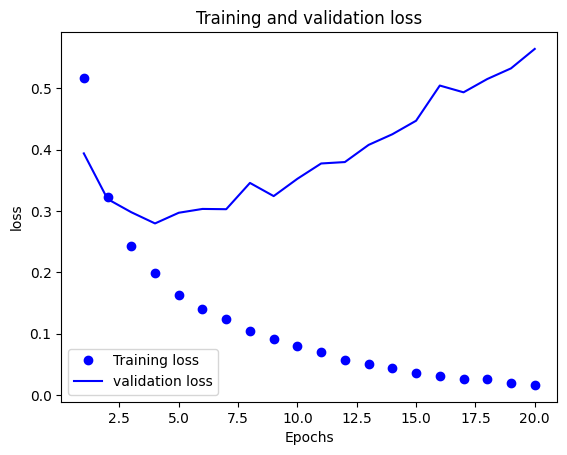

In [26]:
#plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epochs=range(1, len(loss_values)+1)
plt.plot(epochs,loss_values,"bo",label="Training loss")
plt.plot(epochs,val_loss_values,"b",label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


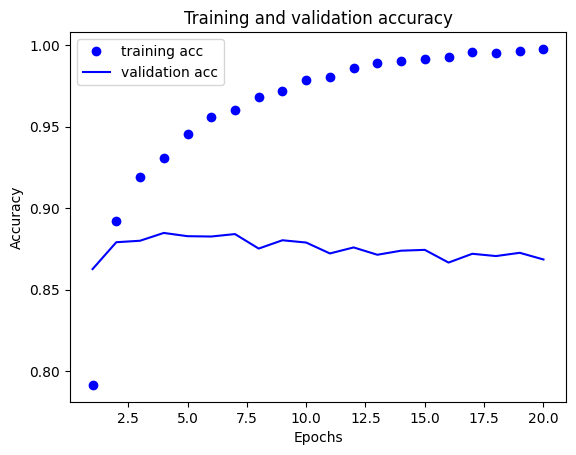

In [28]:
#plotting the validation accuracy and training
plt.clf()
acc=history_dict["accuracy"]
val_acc=history_dict["val_accuracy"]
plt.plot(epochs,acc,"bo",label="training acc")
plt.plot(epochs,val_acc,"b",label="validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
#Retraining the model from scratch to avoid overfitting
model=keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

In [34]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [35]:
model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 2s 24ms/step - loss: 0.4558 - accuracy: 0.8108
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2662 - accuracy: 0.9049
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2084 - accuracy: 0.9255
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2884 - accuracy: 0.8847


In [36]:
#Using a trained model to generate predictions on new data
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.17224272],
       [0.9997083 ],
       [0.79837847],
       ...,
       [0.09015435],
       [0.05452556],
       [0.59094244]], dtype=float32)

In [37]:
# The model is confident for some samples (0.99 or more) but less confident for others (0.1,0.5)

In [41]:
"""
1) Used two layers before the final classification

2) Can used more units 32, 64,128

3) can use mse loss function inplace of binary_crossentropy

4) Can used tanh activation instead of relu
"""

'\n1) Used two layers before the final classification\n\n2) Can used more units 32, 64,128\n\n3) can use mse loss function inplace of binary_crossentropy\n\n4) Can used tanh activation instead of relu\n'

In [43]:
#Lets train with some changes
#Building the model
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Dense(64,activation="tanh"),
    layers.Dense(64,activation="tanh"),
    layers.Dense(1,activation="sigmoid")
])

In [44]:
#compiling the model
model.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["accuracy"]


)

In [45]:
#Training the model
history=model.fit(partial_x_train,
                   partial_y_train,
                   batch_size=512,
                   epochs=5,
                   validation_data=(x_val,y_val)

                   )


Epoch 1/5
30/30 [==============================] - 4s 117ms/step - loss: 0.1667 - accuracy: 0.7579 - val_loss: 0.1116 - val_accuracy: 0.8551
Epoch 2/5
30/30 [==============================] - 2s 62ms/step - loss: 0.0889 - accuracy: 0.8856 - val_loss: 0.0970 - val_accuracy: 0.8701
Epoch 3/5
30/30 [==============================] - 2s 62ms/step - loss: 0.0687 - accuracy: 0.9103 - val_loss: 0.0823 - val_accuracy: 0.8881
Epoch 4/5
30/30 [==============================] - 2s 56ms/step - loss: 0.0592 - accuracy: 0.9240 - val_loss: 0.0872 - val_accuracy: 0.8806
Epoch 5/5
30/30 [==============================] - 2s 61ms/step - loss: 0.0466 - accuracy: 0.9411 - val_loss: 0.1009 - val_accuracy: 0.8674


In [46]:
#Hmmmmmmmmm no changes at all